#  Linear Discriminant Analysis (LDA) — Notes

---

## **1. Setup**

We observe training data  
$$
(x^{(i)},\, Y^{(i)}), \quad i = 1,\ldots,N,
$$  
where:

- each $x^{(i)} \in \mathbb{R}^k$ is a feature vector,
- each $Y^{(i)} \in \{0,1\}$ is a binary class label.

We want a classifier
$$
\hat{Y}:\mathbb{R}^k \to \{0,1\}
$$
which partitions $\mathbb{R}^k$ into regions
$$
P_0 = \{x : \hat{Y}(x)=0\}, \qquad
P_1 = \{x : \hat{Y}(x)=1\}.
$$

---

## **2. Modeling Assumptions**

We assume **class-conditional normal distributions**:

- If $Y=0$ then  
  $$
  x \sim N_k(\mu^{(0)}, \Sigma)
  $$
- If $Y=1$ then  
  $$
  x \sim N_k(\mu^{(1)}, \Sigma)
  $$

where **both classes share the same covariance matrix** $\Sigma$.

From the training data:

- Number of samples in each class:
  $$
  N_0 = \sum_{i=1}^N I(Y^{(i)}=0), \qquad
  N_1 = \sum_{i=1}^N I(Y^{(i)}=1).
  $$

- Sample means:
  $$
  \hat{\mu}^{(0)} = \frac{1}{N_0}\sum_{Y^{(i)}=0} x^{(i)}, 
  \qquad
  \hat{\mu}^{(1)} = \frac{1}{N_1}\sum_{Y^{(i)}=1} x^{(i)}.
  $$

- Pooled covariance estimate:
  $$
  \hat{\Sigma}
  =
  \frac{1}{N}
  \left[
    \sum_{Y^{(i)}=0} (x^{(i)}-\mu^{(0)})(x^{(i)}-\mu^{(0)})^T
    +
    \sum_{Y^{(i)}=1} (x^{(i)}-\mu^{(1)})(x^{(i)}-\mu^{(1)})^T
  \right]
  $$

(For the derivation below we pretend the true parameters are known.)

---

## **3. Prior Probabilities**

We assume prior class probabilities:

$$
P(Y=y) = \pi_y, \qquad y=0,1.
$$

---

## **4. Posterior Class Probabilities by Bayes’ Rule**

For $y=0,1$:

$$
P(Y=y\mid x)
=
C \cdot p(x\mid Y=y)\,\pi_y
$$

where $C$ is a normalizing constant ensuring probabilities sum to 1.

The class-conditional density is multivariate normal:

$$
p(x\mid Y=y)
=
\frac{1}{(2\pi)^{k/2}\sqrt{\det\Sigma}}
\exp\left(
-\frac12 (x - \mu^{(y)})^T
\Sigma^{-1}
(x - \mu^{(y)})
\right).
$$

---

## **5. The Odds Ratio**

Consider the ratio:

$$
\frac{P(Y=1\mid x)}{P(Y=0\mid x)}
=
\frac{
\exp\left(-\frac12(x-\mu^{(1)})^T\Sigma^{-1}(x-\mu^{(1)})\right)\pi_1
}{
\exp\left(-\frac12(x-\mu^{(0)})^T\Sigma^{-1}(x-\mu^{(0)})\right)\pi_0
}.
$$

Simplify the exponent:

- Expand both quadratic forms.
- The terms involving $x^T\Sigma^{-1}x$ **cancel**.
- What remains is linear in $x$:

$$
x^T\Sigma^{-1}(\mu^{(1)} - \mu^{(0)})
+
\frac12\left[
\mu^{(0)T}\Sigma^{-1}\mu^{(0)}
-
\mu^{(1)T}\Sigma^{-1}\mu^{(1)}
\right]
+
\log\left(\frac{\pi_1}{\pi_0}\right).
$$

Thus the odds ratio is a monotone increasing function of the **linear discriminant**:
$$
x^T w
\qquad\text{where}\qquad
w = \Sigma^{-1}(\mu^{(1)} - \mu^{(0)}).
$$

---

## **6. Linear Discriminant Classifier**

Since the decision rule depends on $x^T w$ compared to a threshold $\tau$, we define:

$$
\hat{Y}(x) =
\begin{cases}
0, & x^T w < \tau, \\
1, & x^T w \ge \tau.
\end{cases}
$$

This divides $\mathbb{R}^k$ into two half-spaces separated by the **hyperplane**:
$$
x^T w = \tau.
$$

Thus LDA produces a **linear decision boundary**.

---

## **7. Special Case: Independent Features with Equal Variance**

When $k=2$ and  
$$
\Sigma = \sigma^2 I_2,
$$
then:

- Features are independent  
- Variances are equal  
- The inverse covariance is  
  $$
  \Sigma^{-1} = \frac{1}{\sigma^2} I_2.
  $$

Then  

$$
w = \Sigma^{-1}(\mu^{(1)} - \mu^{(0)})
= \frac{1}{\sigma^2}(\mu^{(1)} - \mu^{(0)})
$$

and the decision boundary  
$$
x^T w = \tau
$$

is simply a **straight line** in $\mathbb{R}^2$ with normal vector $(\mu^{(1)} - \mu^{(0)})$.

---

# **Summary**

- LDA assumes each class is multivariate normal with **same covariance**.
- Posterior log-odds is **linear in x**.
- Classifier is of the form  
  $$
  x^T w \gtrless \tau.
  $$
- Decision boundary is always a **hyperplane**.
- In $k=2$, it is a straight line.

---

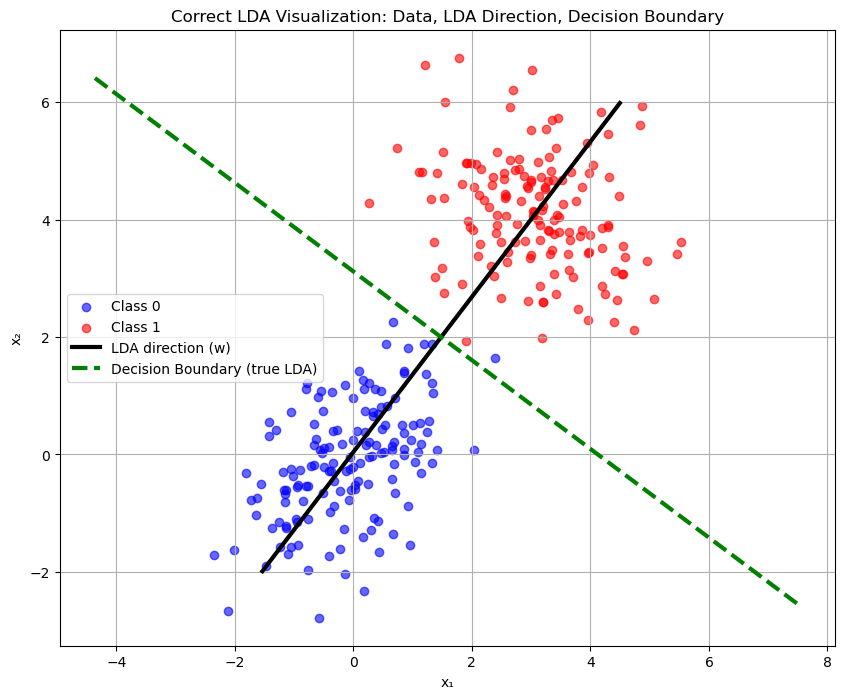

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2-class data
np.random.seed(681)

# Class 0
mean0 = np.array([0, 0])
cov0 = np.array([[1, 0.5],
                 [0.5, 1]])
X0 = np.random.multivariate_normal(mean0, cov0, 150)

# Class 1
mean1 = np.array([3, 4])
cov1 = np.array([[1, -0.2],
                 [-0.2, 1]])
X1 = np.random.multivariate_normal(mean1, cov1, 150)

X = np.vstack([X0, X1])
y = np.array([0]*150 + [1]*150)

# Compute LDA

# Means
m0 = X0.mean(axis=0)
m1 = X1.mean(axis=0)

# Covariances
S0 = np.cov(X0.T)
S1 = np.cov(X1.T)
n0, n1 = len(X0), len(X1)

# Pooled covariance (within-class scatter)
Sw = ((n0-1)*S0 + (n1-1)*S1) / (n0 + n1 - 2)

# Discriminant direction 
w = np.linalg.inv(Sw) @ (m1 - m0)
w = w / np.linalg.norm(w)   # normalize for plotting

# True decision boundary:
# Solve w'x = c
# where c = (w'μ0 + w'μ1)/2  for equal priors
c = 0.5 * (w @ m0 + w @ m1)

# Plot everything
plt.figure(figsize=(10,8))

# Scatter points
plt.scatter(X0[:,0], X0[:,1], color="blue", alpha=0.6, label="Class 0")
plt.scatter(X1[:,0], X1[:,1], color="red",  alpha=0.6, label="Class 1")

# LDA direction line (goes through midpoint of means)
midpoint = 0.5*(m0 + m1)
line_pts = np.array([midpoint - 5*w, midpoint + 5*w])
plt.plot(line_pts[:,0], line_pts[:,1], color="black", linewidth=3, 
         label="LDA direction (w)")

# Decision boundary line (perpendicular to w)
xs = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 300)
ys = (c - w[0]*xs) / w[1]
plt.plot(xs, ys, '--', color="green", linewidth=3,
         label="Decision Boundary (true LDA)")

plt.title("Correct LDA Visualization: Data, LDA Direction, Decision Boundary")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()